This script is used for understanding the wave, tide, and other conditions of a site

In [119]:
import sys
import os
import numpy as np
import netCDF4 as nc4
import datetime
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(r'C:\Users\kelby\OneDrive\Desktop\MIT-WHOI\Code')
import helper_functions.data_tools as data_tools
import helper_functions.wave_conditions as wave_conditions
import helper_functions.wave_functions as wave_functions

Setup the file path for the site data and visualize the folder structure if needed

In [120]:
### Set the folder location for the new site
site_folder = r"D:\Kelby_Kramer\sites"
# site_folder = r"C:\Users\kelby\OneDrive\Desktop\MIT-WHOI\sites"
### Set the name of the new site
# site_name = "duck"
# site_name = "salinas_river"
site_name = "montara"

buoy_dict_path = os.path.join(site_folder, 'buoy_dict.csv')
buoy_dict_df = pd.read_csv(buoy_dict_path)

### set the buoys info and beach characteristics for each site
if site_name == 'salinas_river':
    ### beach characteristics
    shore_parallel_heading = 190 # heading of the shore parallel line from north to south (degrees)
    shore_normal_heading = shore_parallel_heading + 90 # heading of the shore normal line (degrees) 
    ### buoy characteristics
    buoy_dict = buoy_dict_df.loc[buoy_dict_df['site_name'] == 'salinas_river']
    for i in range(len(buoy_dict)):
        if buoy_dict['org'].iloc[i] == 'NDBC':
            NDBC_buoy_id = buoy_dict['buoy_id'].iloc[i]
            NDBC_buoy_depth = buoy_dict['water_depth'].iloc[i]
            NDBC_buoy_lat = buoy_dict['lat'].iloc[i]
            NDBC_buoy_lon = buoy_dict['lon'].iloc[i]
            NDBC_buoy_dist_to_shore = buoy_dict['dist_to_shore'].iloc[i]
        elif buoy_dict['org'].iloc[i] == 'CDIP':
            CDIP_buoy_id = buoy_dict['buoy_id'].iloc[i]
            CDIP_buoy_depth = buoy_dict['water_depth'].iloc[i]
            CDIP_buoy_lat = buoy_dict['lat'].iloc[i]
            CDIP_buoy_lon = buoy_dict['lon'].iloc[i]
            CDIP_buoy_dist_to_shore = buoy_dict['dist_to_shore'].iloc[i]
        elif buoy_dict['org'].iloc[i] == 'WIS':
            WIS_buoy_id = buoy_dict['buoy_id'].iloc[i]
            WIS_region = buoy_dict['region'].iloc[i]
            WIS_buoy_depth = buoy_dict['water_depth'].iloc[i]
            WIS_buoy_lat = buoy_dict['lat'].iloc[i]
            WIS_buoy_lon = buoy_dict['lon'].iloc[i]
            WIS_buoy_dist_to_shore = buoy_dict['dist_to_shore'].iloc[i]
elif site_name == 'duck':
    ### beach characteristics
    D = (0.2)*1e-3 # average grain size (m) # Ellenson, A. N., Simmons, J. A., Wilson, G. W., Hesser, T. J., & Splinter, K. D. (2020). Beach State Recognition Using Argus Imagery and Convolutional Neural Networks. Remote Sensing, 12(23), Article 23. https://doi.org/10.3390/rs12233953
    S = 2.65 # Specific gravity of the sediment
    Cd = 0.002 # drag coefficient # can do more to find the specific value using Coastal Dynamics pg276
    ws = wave_functions.get_ws_stokes(S,D) # fall velocity of sand (m/s)
    shore_parallel_heading = 160 # heading of the shore parallel line from north to south (degrees)
    shore_normal_heading = shore_parallel_heading - 90 # heading of the shore normal line (degrees)
    ### buoy characteristics
    buoy_dict = buoy_dict_df.loc[buoy_dict_df['site_name'] == 'duck']
    for i in range(len(buoy_dict)):
        if buoy_dict['org'].iloc[i] == 'NDBC':
            NDBC_buoy_id = buoy_dict['buoy_id'].iloc[i]
            NDBC_buoy_depth = buoy_dict['water_depth'].iloc[i]
            NDBC_buoy_lat = buoy_dict['lat'].iloc[i]
            NDBC_buoy_lon = buoy_dict['lon'].iloc[i]
            NDBC_buoy_dist_to_shore = buoy_dict['dist_to_shore'].iloc[i]
        elif buoy_dict['org'].iloc[i] == 'CDIP':
            CDIP_buoy_id = buoy_dict['buoy_id'].iloc[i]
            CDIP_buoy_depth = buoy_dict['water_depth'].iloc[i]
            CDIP_buoy_lat = buoy_dict['lat'].iloc[i]
            CDIP_buoy_lon = buoy_dict['lon'].iloc[i]
            CDIP_buoy_dist_to_shore = buoy_dict['dist_to_shore'].iloc[i]
        elif buoy_dict['org'].iloc[i] == 'WIS':
            WIS_buoy_id = buoy_dict['buoy_id'].iloc[i]
            WIS_region = buoy_dict['region'].iloc[i]
            WIS_buoy_depth = buoy_dict['water_depth'].iloc[i]
            WIS_buoy_lat = buoy_dict['lat'].iloc[i]
            WIS_buoy_lon = buoy_dict['lon'].iloc[i]
            WIS_buoy_dist_to_shore = buoy_dict['dist_to_shore'].iloc[i]
elif site_name == 'montara':
    ### beach characteristics
    D = (0.4)*1e-3 # average grain size (m) #https://pubs.geoscienceworld.org/sepm/jsedres/article/44/1/151/96662/Surface-textures-of-first-cycle-quartz-sand-grains
    S = 2.65 # Specific gravity of the sediment
    Cd = 0.002 # drag coefficient # can do more to find the specific value using Coastal Dynamics pg276
    ws = wave_functions.get_ws_stokes(S,D) # fall velocity of sand (m/s)
    buoy_dict = buoy_dict_df.loc[buoy_dict_df['site_name'] == 'montara']
    shore_parallel_heading = 188 # heading of the shore parallel line from north to south (degrees)
    shore_normal_heading = shore_parallel_heading + 90 # heading of the shore normal line (degrees)
    for i in range(len(buoy_dict)):
        if buoy_dict['org'].iloc[i] == 'NDBC':
            NDBC_buoy_id = buoy_dict['buoy_id'].iloc[i]
            NDBC_buoy_depth = buoy_dict['water_depth'].iloc[i]
            NDBC_buoy_lat = buoy_dict['lat'].iloc[i]
            NDBC_buoy_lon = buoy_dict['lon'].iloc[i]
            NDBC_buoy_dist_to_shore = buoy_dict['dist_to_shore'].iloc[i]
        elif buoy_dict['org'].iloc[i] == 'CDIP':
            CDIP_buoy_id = buoy_dict['buoy_id'].iloc[i]
            CDIP_buoy_depth = buoy_dict['water_depth'].iloc[i]
            CDIP_buoy_lat = buoy_dict['lat'].iloc[i]
            CDIP_buoy_lon = buoy_dict['lon'].iloc[i]
            CDIP_buoy_dist_to_shore = buoy_dict['dist_to_shore'].iloc[i]
        elif buoy_dict['org'].iloc[i] == 'WIS':
            WIS_buoy_id = buoy_dict['buoy_id'].iloc[i]
            WIS_region = buoy_dict['region'].iloc[i]
            WIS_buoy_depth = buoy_dict['water_depth'].iloc[i]
            WIS_buoy_lat = buoy_dict['lat'].iloc[i]
            WIS_buoy_lon = buoy_dict['lon'].iloc[i]
            WIS_buoy_dist_to_shore = buoy_dict['dist_to_shore'].iloc[i]

### Create the path for the site
site_path = os.path.join(site_folder, site_name)

### Retreive the available local data for site environmental conditions
site_contents = data_tools.create_folder_structure_dict(site_path)
print(site_contents)
# Show the folder structure
# data_tools.plot_folder_structure(site_contents, level=0)

NDBC = False
CDIP = False
WIS = True


{'ground_truth': {'profiles': {}, 'sonar': {}}, 'products': {}, 'satellite_imagery': {'radar': {'S1': {}}, 'visual': {'landsat': {}, 'planet': {}, 'S2': {}}}, 'site_conditions': {'buoy_data': {'CDIP': {}, 'NDBC': {'46026': {'files': ['46026h2010_stdmet.txt', '46026h2011_stdmet.txt', '46026h2012_stdmet.txt', '46026h2013_stdmet.txt', '46026h2014_stdmet.txt', '46026h2015_stdmet.txt', '46026h2016_stdmet.txt', '46026h2017_stdmet.txt', '46026h2018_stdmet.txt', '46026h2019_stdmet.txt', '46026h2020_stdmet.txt', '46026h2021_stdmet.txt', '46026h2022_stdmet.txt', '46026h2023_stdmet.txt', '46026stdmet.nc']}}, 'WIS': {'ST83067': {'files': ['ST83067.nc4']}}}, 'hindcast_data': {'WAVEWATCH_III': {}}, 'tide_data': {}}}


Load the data into the workbook

In [121]:
if NDBC:
    # Set the path to the NDBC buoy data
    org = 'NDBC'
    NDBC_nc_path = os.path.join(fr'D:\Kelby_Kramer\sites\{site_name}\site_conditions\buoy_data',org, NDBC_buoy_id,f'{NDBC_buoy_id}stdmet.nc')

    # Load the data
    NDBC_nc = nc4.Dataset(NDBC_nc_path, 'r')
    # Show the variables
    print('NDBC Variables:',NDBC_nc.variables.keys())
    #print the first and last time stamp
    NDBC_first_time = wave_conditions.getHumanTimestamp(NDBC_nc.variables['time'][0],"%Y-%m-%d")
    print(NDBC_first_time)
    NDBC_last_time = wave_conditions.getHumanTimestamp(NDBC_nc.variables['time'][-1],"%Y-%m-%d")
    print(NDBC_last_time)

    # Read in variables
    NDBC_ncTime = NDBC_nc.variables['time'][:]
    NDBC_timeall = [datetime.datetime.fromtimestamp(t) for t in NDBC_ncTime] # Convert ncTime variable to datetime stamps
    NDBC_Hs = NDBC_nc.variables['WVHT'][:]
    NDBC_Tp = NDBC_nc.variables['DPD'][:]
    # No wave direction in NDBC data, create a dummy variable
    NDBC_Dp = np.ones(len(NDBC_Hs))*99

if CDIP:
    # Set the path to the CDIP buoy data
    org = 'CDIP'
    CDIP_nc_path = os.path.join(fr'D:\Kelby_Kramer\sites\{site_name}\site_conditions\buoy_data',org, CDIP_buoy_id,f'{CDIP_buoy_id}p1_historic.nc')

    # Load the data
    CDIP_nc = nc4.Dataset(CDIP_nc_path, 'r')
    # Show the variables
    print('CDIP Variables:',CDIP_nc.variables.keys())
    #print the first and last time stamp
    CDIP_first_time = wave_conditions.getHumanTimestamp(CDIP_nc.variables['sstTime'][0],"%Y-%m-%d")
    print(CDIP_first_time)
    print(CDIP_nc.variables['sstTime'][0])
    CDIP_last_time = wave_conditions.getHumanTimestamp(CDIP_nc.variables['sstTime'][-1],"%Y-%m-%d")
    print(CDIP_last_time)

    # Read in variables
    CDIP_ncTime = CDIP_nc.variables['sstTime'][:]
    CDIP_timeall = [datetime.datetime.fromtimestamp(t) for t in CDIP_ncTime] # Convert ncTime variable to datetime stamps
    CDIP_Hs = CDIP_nc.variables['waveHs']
    CDIP_Tp = CDIP_nc.variables['waveTp']
    CDIP_Dp = CDIP_nc.variables['waveDp']

if WIS:  
    # Set the path to the WIS buoy data
    org = 'WIS'
    WIS_nc_path = os.path.join(fr'D:\Kelby_Kramer\sites\{site_name}\site_conditions\buoy_data',org, WIS_buoy_id,f'{WIS_buoy_id}.nc4')

    # Load the data
    WIS_nc = nc4.Dataset(WIS_nc_path, 'r')
    # Show the variables
    print('WIS Variables:',WIS_nc.variables.keys())
    #print the first and last time stamp
    WIS_first_time = wave_conditions.getHumanTimestamp(WIS_nc.variables['time'][0],"%Y-%m-%d")
    print(WIS_first_time)
    WIS_last_time = wave_conditions.getHumanTimestamp(WIS_nc.variables['time'][-1],"%Y-%m-%d")
    print(WIS_last_time)

    # Read in variables
    WIS_ncTime = WIS_nc.variables['time'][:]
    WIS_timeall = [datetime.datetime.fromtimestamp(t) for t in WIS_ncTime] # Convert ncTime variable to datetime stamps
    WIS_Hs = WIS_nc.variables['waveHs'][:]
    WIS_Tp = WIS_nc.variables['waveTpPeak'][:]
    WIS_Dp = WIS_nc.variables['waveMeanDirection'][:]


WIS Variables: dict_keys(['station_name', 'longitude', 'latitude', 'waveHsWindsea', 'waveSpreadWindsea', 'waveTm2Windsea', 'waveHs', 'waveMeanDirection', 'waveTm1Windsea', 'frictionalVelocity', 'waveTpPeakSwell', 'waveMeanDirectionSwell', 'waveTpPeakWindsea', 'waveSpread', 'waveSpreadSwell', 'waveTmWindsea', 'waveDirectionBins', 'waveTpPeak', 'waveTmSwell', 'waveTm2Swell', 'waveTpWindsea', 'waveStress', 'coefficientOfDrag', 'waveTm1Swell', 'waveTpSwell', 'windDirection', 'waveTm1', 'waveFrequency', 'waveTm2', 'waveMeanDirectionWindsea', 'waveTp', 'waveHsSwell', 'windSpeed', 'waveTm', 'time'])
1980-02-01
2023-01-01


Compare the signifigant wave height history for each 

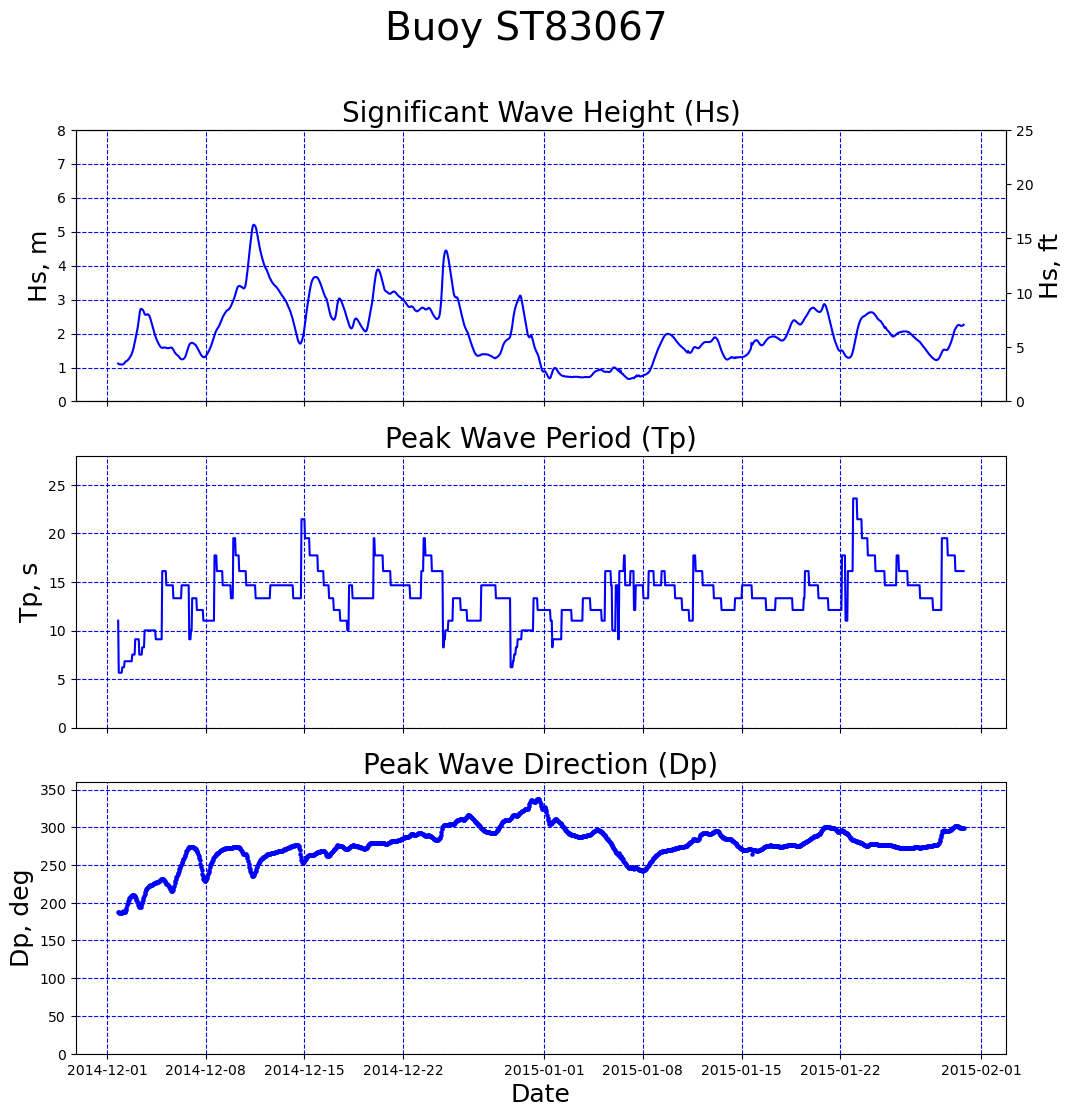

In [133]:
### Duck DOI
# Hurricane Irene 
# startdate = '2011-08-22'
# enddate = '2011-09-08'
# Huricane Hurricane Matthew
# startdate = '2016-08-01'
# enddate = '2016-11-13'
# Weird Anomoly at CDIP 430
# startdate = '2012-08-27'
# enddate = '2012-09-03'
# Looks like buoy data was redacted for 44100 when the anomoly occured @ 430 (the same buoy)
# startdate = '2012-01-01'
# enddate = '2012-12-31'
### Salinas River DOI
# startdate = '2019-01-01'
# enddate = '2019-02-01'

DOI = '2015-01-01'
time_format="%Y-%m-%d"
before = 30
after = 30

startdate, enddate, DOI = wave_conditions.get_range_around_DOI(DOI,time_format,before,after)


if NDBC:
    NDBC_wavehist_plt = wave_conditions.wave_history_plt(NDBC_ncTime, NDBC_timeall, NDBC_Hs, NDBC_Tp, NDBC_Dp, NDBC_buoy_id, startdate, enddate)
    NDBC_wavehist_plt.show()
if CDIP:
    CDIP_wavehist_plt = wave_conditions.wave_history_plt(CDIP_ncTime, CDIP_timeall, CDIP_Hs, CDIP_Tp, CDIP_Dp, CDIP_buoy_id, startdate, enddate)
    CDIP_wavehist_plt.show()
if WIS:
    WIS_wavehist_plt = wave_conditions.wave_history_plt(WIS_ncTime, WIS_timeall, WIS_Hs, WIS_Tp, WIS_Dp, WIS_buoy_id, startdate, enddate)
    WIS_wavehist_plt.show()


Check the buoy characteristics to see up to what wave height the buoy can be classified as deep water

In [123]:
deep_water_period = wave_functions.deep_water_period(WIS_buoy_depth)
print('Waves with a period less than',deep_water_period,'s are considered deep water waves for this buoy')

Waves with a period less than 138.96000672 s are considered deep water waves for this buoy


Clip data to a reasonable timeframe

In [124]:
DOI = '2016-04-05'
time_format="%Y-%m-%d"
before = 120/2
after = 120/2

startdate, enddate, DOI = wave_conditions.get_range_around_DOI(DOI,time_format,before,after)

ncTime_clipped = wave_conditions.clip_data(WIS_ncTime, time_format, startdate, enddate, WIS_ncTime)
timeall_clipped = wave_conditions.clip_data(WIS_ncTime, time_format, startdate, enddate, WIS_timeall)
H0s = wave_conditions.clip_data(WIS_ncTime, time_format, startdate, enddate, WIS_Hs)
T0s = wave_conditions.clip_data(WIS_ncTime, time_format, startdate, enddate, WIS_Tp)
Dp = wave_conditions.clip_data(WIS_ncTime, time_format, startdate, enddate, WIS_Dp)
theta0 = wave_functions.get_theta_relative_to_shore(shore_normal_heading,Dp)
# print('Shape of clipped data:',np.shape(H0s))



Generate the wave parameters over the depth for the condition time series

In [125]:
hs = wave_functions.create_depth_array(WIS_buoy_depth, h_final = 0.05, dh = 0.05)
# print(hs.shape)
hs_matrix = np.tile(hs,(len(T0s),1)).T
# print('hs_matrix.shape',hs_matrix.shape)

cs, ks, Ls = wave_functions.disp_iterative_c(T0s,hs_matrix)
# print('cs.shape:',cs.shape)

In [126]:
c0s = cs[0,:]
L0s = Ls[0,:]
Cg0s = c0s/2

Hs, thetas = wave_functions.get_H_shoal(H0s,L0s,WIS_buoy_depth,c0s,Ls,hs_matrix,cs,np.radians(theta0))
# print('Hs.shape:',Hs.shape)
# print('thetas.shape:',thetas.shape)

gamma = 0.78
hbs, Hbs, thetabs, break_index = wave_functions.get_break_h_and_H(Hs.T,hs_matrix.T,thetas.T,gamma)
# print('Hbs.shape:',Hbs.shape)
# print('Hbs:',Hbs[200])

Get the dimensionless Fall Velocity omega

0.14388


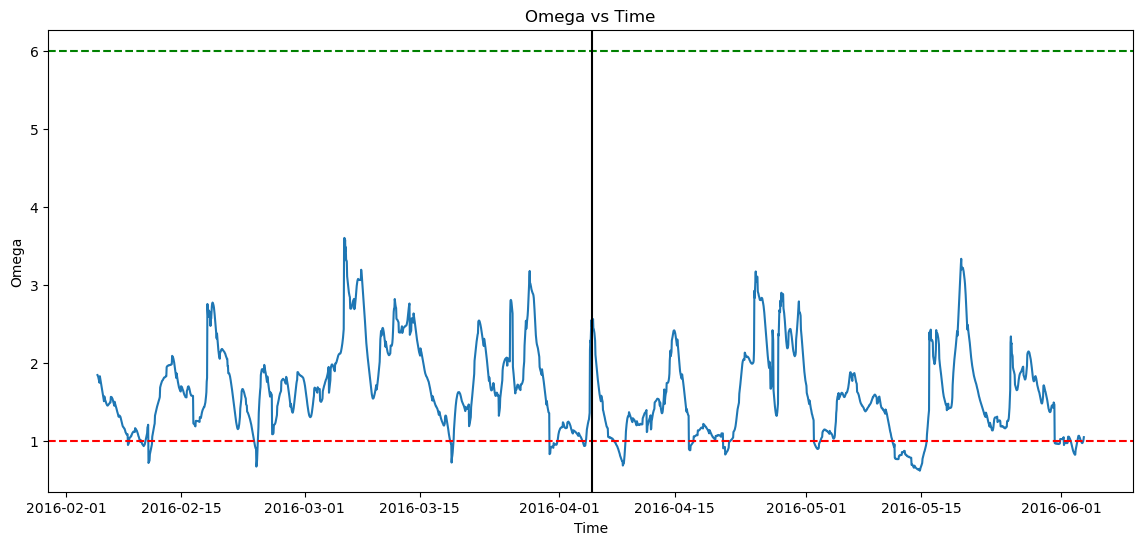

In [127]:
print(ws)

Omega = wave_functions.get_DFV_Omega(Hbs,T0s,ws)

# plot Omega vs timeall_clipped
plt.figure()
plt.plot(timeall_clipped,Omega)
plt.xlabel('Time')
plt.ylabel('Omega')
plt.title('Omega vs Time')
plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=6, color='g', linestyle='--')
plt.axvline(x=DOI, color='black', linestyle='-')
# make the figure wider
fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.show()